# We can solve this problem in 2 different way . 1st one is the way TA showed us . 2nd one i made using  finding help  from internet

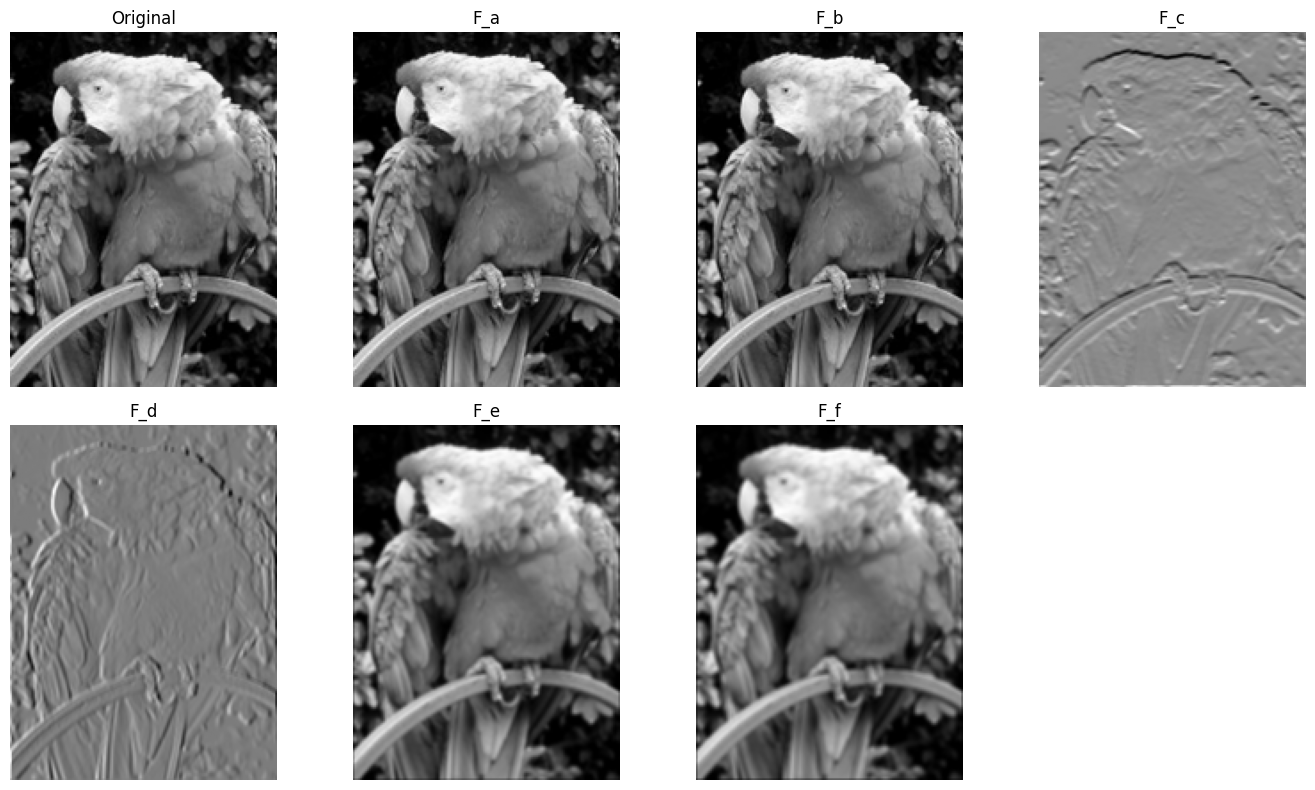

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


I = cv2.imread("/content/parrot.png", 0)


if I is None:
    raise FileNotFoundError("Image 'Parrot.png' not found.")



def correlation(I, F):
    F_flat = F.reshape(-1, 1)
    I_ = np.pad(I, 1, 'constant')

    h, w = I.shape
    G = np.zeros((h, w), dtype=float)

    # Iterate through each pixel of the image
    for i in range(h):
        for j in range(w):
            I_flat = I_[i:i+3, j:j+3].flatten().reshape(-1, 1)
            G[i, j] = np.sum(I_flat * F_flat)

    return G



def normalize_for_display(G):
    G = G.astype(float)
    mn, mx = G.min(), G.max()


    if mn < 0:
        max_abs = max(abs(mn), abs(mx))
        return (G + max_abs) / (2 * max_abs + 1e-12)
    else:
        return (G - mn) / (mx - mn + 1e-12)



F_a = np.array([[0, 0, 0],
                [0, 1, 0],
                [0, 0, 0]])

F_b = np.array([[1, 0, 0],
                [0, 0, 0],
                [0, 0, 0]])

F_c = np.array([[1, 1, 1],
                [0, 0, 0],
                [-1, -1, -1]])

F_d = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

F_e = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]]) / 16

F_f = np.ones((3, 3)) / 9



results = {
    'Original': I,
    'F_a': correlation(I, F_a),
    'F_b': correlation(I, F_b),
    'F_c': correlation(I, F_c),
    'F_d': correlation(I, F_d),
    'F_e': correlation(I, F_e),
    'F_f': correlation(I, F_f),
}



plt.figure(figsize=(14, 8))
for idx, (title, img) in enumerate(results.items()):
    plt.subplot(2, 4, idx + 1)


    if title == "Original":
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(normalize_for_display(img), cmap='gray')

    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


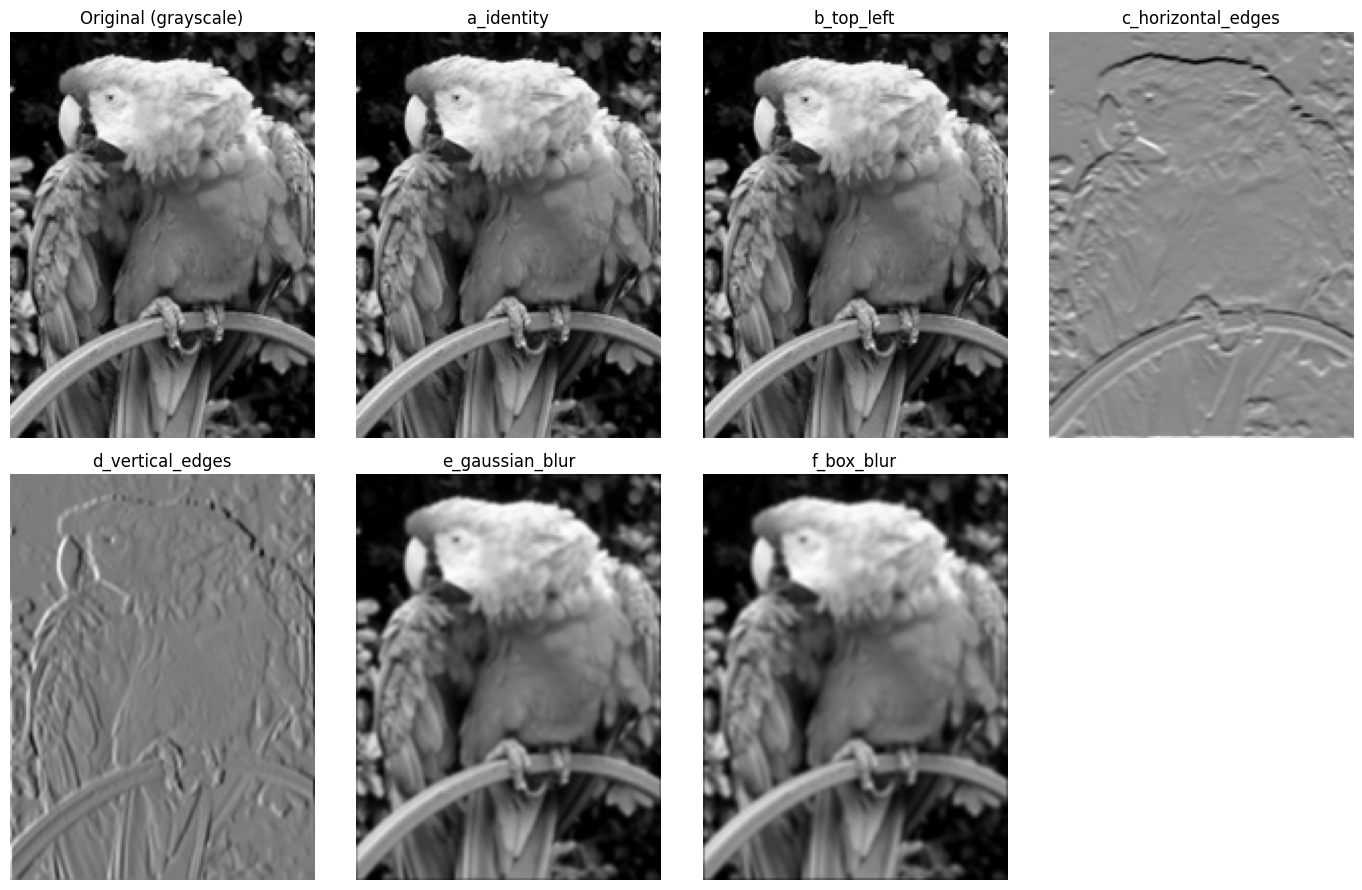

  Output images saved as Gpng


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def correlate2d(F, I):

    F = np.array(F, dtype=float)
    I = np.array(I, dtype=float)

    fh, fw = F.shape
    assert fh % 2 == 1 and fw % 2 == 1, "Filter must have odd shape (e.g., 3x3)."

    pad_h, pad_w = fh // 2, fw // 2


    Ibar = np.pad(I, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0)

    m, n = I.shape
    G = np.zeros((m, n), dtype=float)

    for i in range(m):
        for j in range(n):
            patch = Ibar[i:i+fh, j:j+fw]
            G[i, j] = np.sum(F * patch)

    return G



def normalize_for_display(img):

    img = np.array(img, dtype=float)
    mn, mx = img.min(), img.max()

    if mn < 0:
        max_abs = max(abs(mn), abs(mx))
        return (img + max_abs) / (2 * max_abs + 1e-12)
    else:
        return (img - mn) / (mx - mn + 1e-12)



img = Image.open("/content/parrot.png").convert("L")
I = np.array(img, dtype=float)

filters = {
    "a_identity": np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]]),

    "b_top_left": np.array([[1, 0, 0],
                            [0, 0, 0],
                            [0, 0, 0]]),

    "c_horizontal_edges": np.array([[1, 1, 1],
                                    [0, 0, 0],
                                    [-1, -1, -1]]),

    "d_vertical_edges": np.array([[-1, 0, 1],
                                  [-1, 0, 1],
                                  [-1, 0, 1]]),

    "e_gaussian_blur": (1/16) * np.array([[1, 2, 1],
                                          [2, 4, 2],
                                          [1, 2, 1]]),

    "f_box_blur": (1/9) * np.ones((3, 3))
}


plt.figure(figsize=(14, 9))


plt.subplot(2, 4, 1)
plt.imshow(I, cmap="gray")
plt.title("Original (grayscale)")
plt.axis("off")

idx = 2
for name, F in filters.items():
    G = correlate2d(F, I)


    G_disp = normalize_for_display(G)


    plt.subplot(2, 4, idx)
    plt.imshow(G_disp, cmap="gray")
    plt.title(name)
    plt.axis("off")


    out_name = f"G_{name}.png"
    Image.fromarray((G_disp * 255).astype(np.uint8)).save(out_name)

    idx += 1

plt.tight_layout()
plt.show()

print("Output images saved as Gpng")
